Multivariate SARIMAX Forecasting Nuitees dans l'hôtellerie Provence-Alpes-Côte d'Azur PAC 2016 
Set "stepwise = true" in auto-arima. Include exogenous variables in training & test datasets
Datasets https://github.com/jinnyto/touristcast/tree/datasets/datasets

In [41]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pyramid
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [42]:
dn = pd.read_csv('./datasets/nights_2010-2017.csv',parse_dates=['date'], index_col='date',usecols=[*range(1, 15)])
dm = pd.read_csv('./datasets/avgtemp_2010-2017.csv',parse_dates=['date'],index_col='date',usecols=[*range(1, 15)])
dh = pd.read_csv('./datasets/daysoff_2010-2017.csv',parse_dates=['date'],index_col='date',usecols=['date','daysoff'])
dg = pd.read_csv('./datasets/regionalGDP_2010-2015.csv',parse_dates=['date'],index_col='date',usecols=[*range(1, 15)])
dr = pd.concat([dn, dm,dh,dg], axis=1)
df = dr.dropna()
df = df[['nights_PAC','avgtemp_PAC','gdp_PAC','daysoff']]
exogenous= np.array(df[['avgtemp_PAC','gdp_PAC','daysoff']])
y = np.array(df.nights_PAC)

<Figure size 432x288 with 0 Axes>

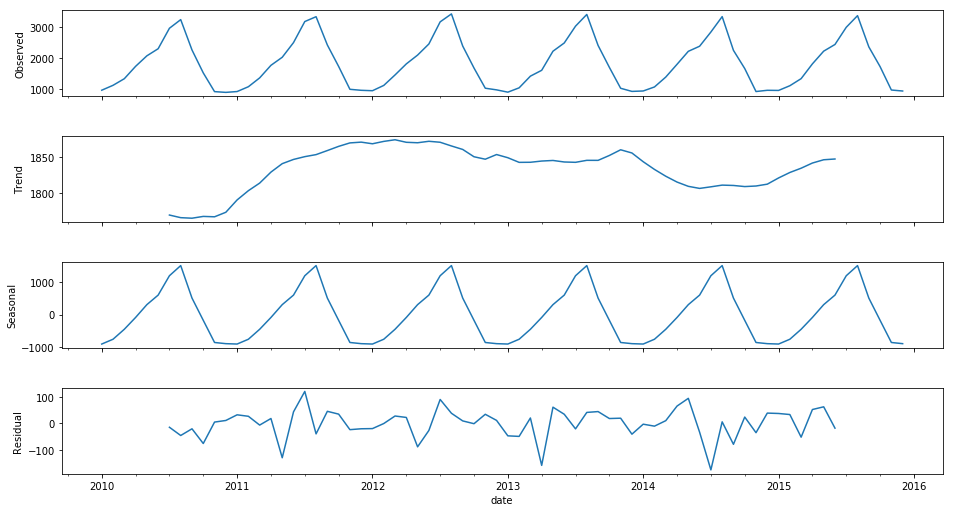

In [43]:
decomposition = seasonal_decompose(df.nights_PAC, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

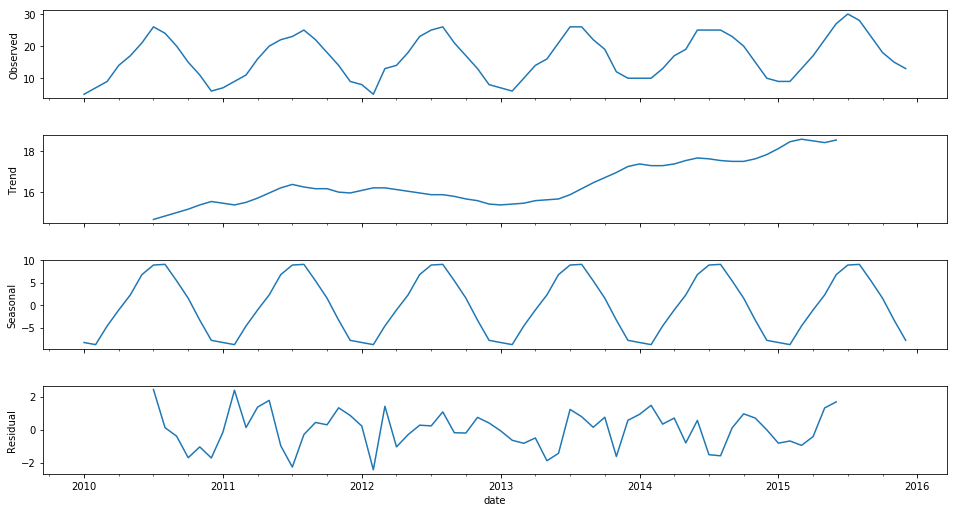

In [44]:
decomposition = seasonal_decompose(df.avgtemp_PAC, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

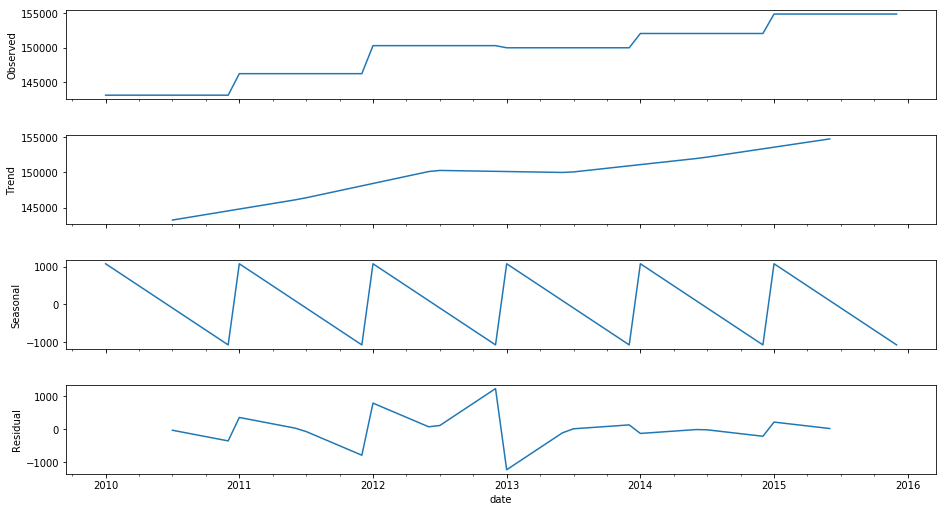

In [45]:
decomposition = seasonal_decompose(df.gdp_PAC, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

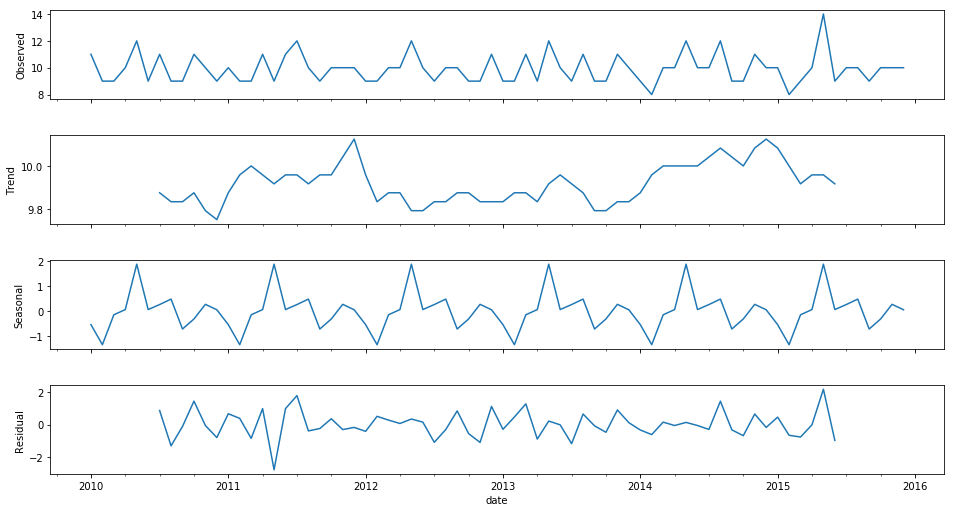

In [46]:
decomposition = seasonal_decompose(df.daysoff, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [47]:
from pyramid.arima import auto_arima
tc_fit = auto_arima(y=y,  exogenous=exogenous,start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                    start_P=1, seasonal=True, d=1, D=1, trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=True)
tc_fit.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=701.737, BIC=716.280, Fit time=1.480 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=709.629, BIC=720.017, Fit time=0.132 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=699.327, BIC=713.870, Fit time=1.558 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=687.750, BIC=702.293, Fit time=1.499 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=689.214, BIC=705.834, Fit time=1.861 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=698.393, BIC=710.858, Fit time=0.544 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=686.360, BIC=702.981, Fit time=1.720 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=694.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -335.180
Date:                            Mon, 20 Aug 2018   AIC                            686.360
Time:                                    10:17:42   BIC                            702.981
Sample:                                         0   HQIC                           692.848
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3731      0.779     -0.479      0.632      -1.900       1.154
x1            -0.2321      6.276     -0.037      0.971     -12.533      12.069
x2             0.0217      0.013      1.650      0.099      -0.004       0.047
x3            25.4305      8.493      2.994      0.003       8.784      42.077
ar.L1          0.3032      0.174      1.744      0.081      -0.038       0.644
ma.L1         -0.9995     15.939     -0.063      0.950     -32.239      30.240
ma.S.L12      -0.6669      0.296     -2.252      0.024      -1.247      -0.087
sigma2      4062.7568   6.49e+04      0.063      0.950   -1.23e+05    1.31e+05
===================================================================================
Ljung-Box (Q):                       30.70   Jarque-Bera (JB):                 7.14
Prob(Q):                              0.85   Prob(JB):                         0.03
Heteroskedasticity (H):               1.37   Skew:                            -0.41
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
dftrain = dr[(dr.index>='2010-01-01')&(dr.index<'2016-01-01')]
train_nights  = np.array(dftrain.nights_PAC)
train_exogenous =  np.array(dftrain[['avgtemp_PAC','daysoff']])

dftest = dr[(dr.index>='2016-01-01')&(dr.index<'2017-01-01')]
test_nights = np.array(dftest.nights_PAC)
test_exogenous =  np.array(dftest[['avgtemp_PAC','daysoff']])


/home/aa/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
tc_fit.fit(train_nights,exogenous=train_exogenous)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [34]:
tc_future_forecast = tc_fit.predict(n_periods=12,exogenous=test_exogenous)

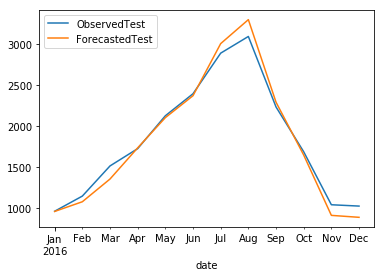

In [35]:
tc_dff = pd.DataFrame(tc_future_forecast, index = dftest.index)
pd.concat([dftest.nights_PAC,tc_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTest')
L.get_texts()[1].set_text('ForecastedTest')

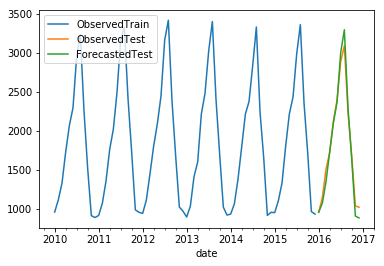

In [36]:
pd.concat([dftrain.nights_PAC,dftest.nights_PAC,tc_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTrain')
L.get_texts()[1].set_text('ObservedTest')
L.get_texts()[2].set_text('ForecastedTest')
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
def MASE(testing_series, prediction_series):
    n = testing_series.shape[0]
    scalingFactor = prediction_series.mean()
    errors = testing_series - prediction_series
    scaledErrors = errors/(np.sum(np.abs(testing_series - scalingFactor)) / n)
    return np.abs(scaledErrors).mean()

In [39]:
mae = mean_absolute_error(test_nights, tc_future_forecast)
print('MAE: %f' % mae)
mse = mean_squared_error(test_nights, tc_future_forecast)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mase = MASE(test_nights,tc_future_forecast)
print('MASE: %f' % mase)

MAE: 81.261518
MSE: 10673.706394
RMSE: 103.313631
MASE: 0.134346
